In [490]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/climate-change/climate_change.csv


In [491]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import datetime as dt
import plotly.figure_factory as ff
import tensorflow as tf
from scipy import stats
import xgboost
import pickle

In [492]:
climate_change=pd.read_csv("../input/climate-change/climate_change.csv")
climate_change.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


# Data Description

* The file climate_change.csv contains climate data from May 1983 to December 2008. The available variables include:

* Year: the observation year.

* Month: the observation month.

* Temp: the difference in degrees Celsius between the average global temperature in that period and a reference value. This data comes from the Climatic Research Unit at the University of East Anglia.

* CO2, N2O, CH4, CFC.11, CFC.12: atmospheric concentrations of carbon dioxide (CO2), nitrous oxide (N2O), methane (CH4), trichlorofluoromethane (CCl3F; commonly referred to as CFC-11) and dichlorodifluoromethane (CCl2F2; commonly referred to as CFC-12), respectively. This data comes from the ESRL/NOAA Global Monitoring Division.CO2, N2O and CH4 are expressed in ppmv (parts per million by volume -- i.e., 397 ppmv of CO2 means that CO2 constitutes 397 millionths of the total volume of the atmosphere)CFC.11 and CFC.12 are expressed in ppbv (parts per billion by volume).

* Aerosols: the mean stratospheric aerosol optical depth at 550 nm. This variable is linked to volcanoes, as volcanic eruptions result in new particles being added to the atmosphere, which affect how much of the sun's energy is reflected back into space. This data is from the Godard Institute for Space Studies at NASA.

* TSI: the total solar irradiance (TSI) in W/m2 (the rate at which the sun's energy is deposited per unit area). Due to sunspots and other solar phenomena, the amount of energy that is given off by the sun varies substantially with time. This data is from the SOLARIS-HEPPA project website.

* MEI: multivariate El Nino Southern Oscillation index (MEI), a measure of the strength of the El Nino/La Nina-Southern Oscillation (a weather effect in the Pacific Ocean that affects global temperatures). This data comes from the ESRL/NOAA Physical Sciences Division.

# Exploratory Data Analysis

In [4]:
climate_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


* We don't have NAN Values

In [7]:
climate_change.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

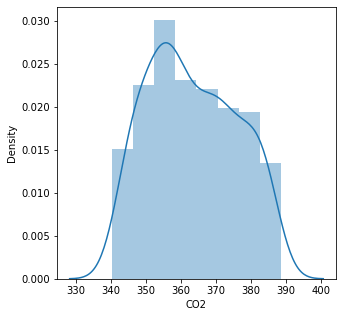

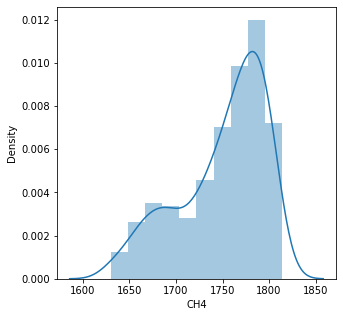

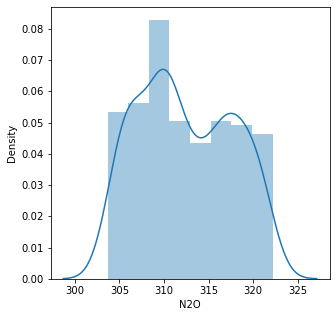

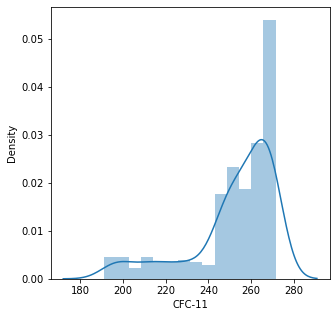

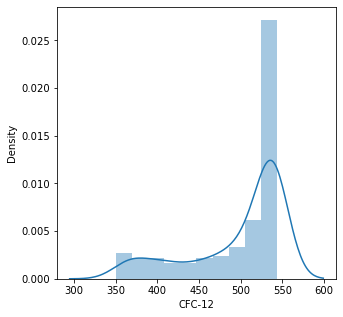

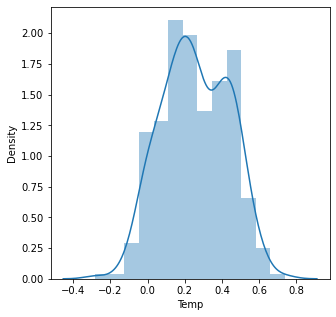

In [38]:
Columns=["CO2","CH4","N2O","CFC-11","CFC-12","Temp"]
for i in Columns:
    plt.figure(figsize=(5,5))
    sns.distplot(climate_change[i])
    


In [84]:
px.scatter(climate_change,x='CO2',y='Temp',title="CO2 VS TEMP")

In [85]:
px.scatter(climate_change,x='CH4',y='Temp',title="CH44 VS TEMP")

In [86]:
px.scatter(climate_change,x='N2O',y='Temp',title="B2O VS TEMP")

In [88]:
px.scatter(climate_change,x='CFC-11',y='Temp',title="CFC-11 VS TEMP")

In [89]:
px.scatter(climate_change,x='CFC-12',y='Temp',title="CFC-12 VS TEMP")

In [97]:
template=['plotly_dark']
fig=go.Figure()
for template in template:
    fig.add_trace(go.Scatter(x=climate_change['Year'],y=climate_change['CO2'],name="CO2"))
    fig.add_trace(go.Scatter(x=climate_change['Year'],y=climate_change['CH4'],name="CH4"))
    fig.add_trace(go.Scatter(x=climate_change['Year'],y=climate_change['N2O'],name="N2O"))
    fig.add_trace(go.Scatter(x=climate_change['Year'],y=climate_change['CFC-11'],name="CFC-11"))
    fig.add_trace(go.Scatter(x=climate_change['Year'],y=climate_change['CFC-12'],name="CFC-12"))
    
    fig.update_layout(template=template,height=800)
    

In [98]:
fig.show()

In [93]:
px.scatter_3d(climate_change,x='CFC-11',y='CFC-12',z='Temp')

In [74]:
fig=go.Figure()
for template in ["plotly_dark"]:
    fig.add_trace(go.Box(x=climate_change["CO2"],name="CO2"))
    fig.add_trace(go.Box(x=climate_change["CH4"],name="CH4"))
    fig.add_trace(go.Box(x=climate_change["N2O"],name="N2O"))
    fig.add_trace(go.Box(x=climate_change["CFC-11"],name="CFC-11"))
    fig.add_trace(go.Box(x=climate_change["CFC-12"],name="CFC-12"))
    fig.update_layout(height=800,template=template)

In [75]:
fig.show()

In [76]:
px.imshow(climate_change.corr())

# Conclusions from EDA
1. The Distributions of CFC-11,CFC-12 are skewed left so we have to transform it to normal distributions.
2. The Scatter plots show that if CO2,CH4,N2O,CFC-11,CFC-12 increase the Temperature difference increase
3. The Line Plots showed that CH4 was increasing rapidly every year till 1995 after that still it is increasing but not like before 1995.From 1983 to 2008 the CH4 has increased by 150 ppmv.
4. From 1995 to 2008 CFC-12 has increased by 185 ppmv. But since 2000 it has decreased by 4ppmv.For CFC-11 it increased from 1990 to 1995 and since then it is decreasing.
5. CO2 was constant till 2000 from then it has increased by 10 ppmv.N2O is constant 
6. The Boxplots of CFC-11.CFC-12 indicate there are outliers but there are because of skewed distributions to left.
7. TSI is not correlated with our target Variable Temp so let's drop it

# Data Preprocessing

In [493]:
climate_change.drop(['TSI','Year','Month'],1,inplace=True)

In [494]:
print("Skewness of CFC-11 before boxcox transformation =",climate_change['CFC-11'].skew())
climate_change['CFC-11']=pd.Series(stats.boxcox(climate_change['CFC-11'])[0])
print("Skewness of CFC-11 after boxcox transformation =",climate_change['CFC-11'].skew())

Skewness of CFC-11 before boxcox transformation = -1.4637385987078573
Skewness of CFC-11 after boxcox transformation = -0.37929188640792766


In [495]:
print("Skewness of CFC-12 before boxcox transformation =",climate_change['CFC-12'].skew())
climate_change['CFC-12']=pd.Series(stats.boxcox(climate_change['CFC-12'])[0])
print("Skewness of CFC-12 after boxcox transformation =",climate_change['CFC-12'].skew())

Skewness of CFC-12 before boxcox transformation = -1.2277238943763658
Skewness of CFC-12 after boxcox transformation = -0.5975477458844747


# Model

In [496]:
X=climate_change.drop('Temp',1).values
y=climate_change['Temp'].values

In [497]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [498]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [499]:
#n=xgboost.XGBRegressor(n_estimators=600,max_depth=4)
#n.fit(X_train_scaled,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [506]:
pickle.dump(n,open("Model.pickle.dat","wb"))

In [508]:
loaded_model=pickle.load(open("./Model.pickle.dat","rb"))

In [509]:
pred=loaded_model.predict(X_test_scaled)

In [510]:
r2_score(y_test,pred)

0.8530362683566548

In [511]:
sub=pd.DataFrame(X_test)
sub.columns=[climate_change.drop('Temp',1).columns]

In [512]:
sub['Temp']=pred

In [513]:
sub.to_csv("Sub.csv")